

## 航空宇宙情報システム学第二

<h1><center> 第2回 NumPyによる行列ベクトル計算 </center> </h1>

<center>

2023年4月18日

担当教員: 矢入健久

e-mail: yairi@g.ecc.u-tokyo.ac.jp
</center>




## NumPy とは
* 公式サイト: http://www.numpy.org/
* Pythonで科学計算を行うためのライブラリの一つで、最も有名なものです。
  * 行列・ベクトルを表現するための多次元配列（multi-dimensional array）をベースとして、線形代数計算用の関数群を提供しています。
  * 特長は、高い計算効率と扱いやすさ（わかりやすさ）を両立しているところだと思います。
  * 「数値」計算に特化しています（一方、SymPyは数式処理を主目的としていました）。
* 少し大袈裟かもしれませんが、<font color="red">もしもNumPyが存在しなかったら、Pythonがこれほどメジャーなプログラミング言語になることはなかった</font>と思います。
* 豊富な機能が含まれますが、今回は行列・ベクトルの基本計算部分にフォーカスして説明していきます。
* Matplotlib （グラフ描画），SciPy （科学技術計算）などと一緒に利用されることも多いです。また、SymPy と組み合わせることもできます。

## NumPy のインポート
* さっそく使ってみよう、ということで、まずはNumPyモジュールをインポートします。
```
>>> import numpy
```
* ただしこれだと、行列`A`とベクトル`b`の掛け算を、`numpy.dot(A,b)`のように、いちいち`numpy.`を関数やオブジェクトの前に付けて呼び出す必要があり不便です。
* 一方、
```
>>>from numpy import *
```
  とすれば、`dot(A,b)`で済みますが、名前が衝突する危険性があるのでお薦めできません。
* そこで、今回は、モジュールに短い別名をつける方法を採用します。
```
>> import numpy as np
```
  のようなインポートの仕方を採用します。この場合、`np.dot(A,b)`のように使います。


In [ ]:
# Numpy モジュールのインポート
import numpy as np

## NumPy での行列とベクトル
### 2次元array型による行列の表現
* NumPyでは<font color="blue">行列やベクトルを`array`型オブジェクト</font>で表現します。
  * `array`型はリストと比べて数値計算に最適化されています。
* 行列は<font color="blue">2次元array型</font>を用いて表現します。
* 行列(2次元array型)を<font color="red">「数値のリストのリスト」から作成</font>する例 :
```
>>> A = np.array([[1,2,0],[-1,3,2],[0,-1,1]])
>>> print(A)
[[ 1 2 0]
[-1 3 2]
[ 0 -1 1]]
```

下のコードの例では、分かりやすいように、リストのリストを作ってから、それを`array`関数に渡して行列(2次元array型)を作っています。

In [ ]:
lst_a = [[1,2,0],[-1,3,2],[0,-1,1]] #リストのリスト
print('list:\n',lst_a,'\n')

A = np.array(lst_a) #2次元array
print('matrix:\n',A)

list:
 [[1, 2, 0], [-1, 3, 2], [0, -1, 1]] 

matrix:
 [[ 1  2  0]
 [-1  3  2]
 [ 0 -1  1]]


なお、行列の<font color="blue">(i,j)成分には、`A[i,j]`でアクセスできます。</font>。スライスのことも含めて詳細は後述します。

In [ ]:
for i in range(3):
  for j in range(3):
    print(A[i,j], end=' ')
  print()

1 2 0 
-1 3 2 
0 -1 1 


**(練習)** 行列 $\boldsymbol{B}=\left[ \begin{matrix} 1 & 2 & 3 \\ 2 & 3 & 4 \\ 3 & 4 & 5 \end{matrix} \right]$ を作成してください。

In [ ]:
B = np.array([[1,2,3],[2,3,4],[3,4,5]])
print(B)

[[1 2 3]
 [2 3 4]
 [3 4 5]]


### 1次元array型によるベクトルの表現
* ベクトルについては、<font color="blue">1次元array型で表現する</font>のが基本です。
```
>>> b = np.array([1, 2, 3])
>>> print(b)
[1 2 3]
```
* この場合、行ベクトル（横長）と列ベクトル（縦長）との区別はありません。
* <font color="blue">この授業では、原則的にこの方式(1次元arrayでベクトルを表現する)を採用します。</font>

In [ ]:
lst_b = [1,2,3]
print('list:\n',lst_b)
b = np.array(lst_b)
print('vector:\n',b)

list:
 [1, 2, 3]
vector:
 [1 2 3]


### 2次元array型によるベクトルの表現
* <font color="red">行ベクトルと列ベクトルを区別して扱いたいときは、行列と同じように2次元array</font>を使います。
  * 行ベクトルの場合:
  ```
  >>> b = np.array([[1,2,3]])
  >>> print(b)
  [[1 2 3]]
  ```
  * 列ベクトルの場合:
  ```
  >>> b = np.array([[1],[2],[3]])
  >>> print(b)
  [[1]
 [2]
 [3]]
  ```
* 行ベクトルと列ベクトルは、（行列のように）<font color="red"> 転置 </font>(transpose)することで互いに変換できます。
* (後で出てきますが)2次元`array`型の転置は、`transpose`メソッド、または、`T`属性で得られます。
```
>>> b = np.array([[1,2,3]])
>>> print(b)
>>> print(b.T)
```

In [ ]:
# 行ベクトル、列ベクトルをリスト（のリスト）から作成
b = np.array([[1,2,3]])
print('row vector:\n',b)
b = np.array([[1],[2],[3]])
print('column vector:\n',b)

row vector:
 [[1 2 3]]
column vector:
 [[1]
 [2]
 [3]]


In [ ]:
# 行ベクトルを転置して列ベクトルを得る
b = np.array([[1,2,3]])
print('row vector:\n',b)
print('transposed:\n',b.T) #b.transpose() でも良い

row vector:
 [[1 2 3]]
transposed:
 [[1]
 [2]
 [3]]


## ベクトルの要素（成分）の参照

* リストとの場合とほぼ同様に参照・アクセスできます。
```
>>> a = np.array([0,1,2])
>>> print(a[1])
1
```
* array型オブジェクトは<font color="blue">変更可能</font>です（これもリストと同じ。）。
```
>>> a[1] = -1
>>> print(a)
[ 0 -1 2]
```
* スライスも使えます（これもリストとほぼ同じように見えるが実は少し違います）。
```
>>> print(a[1:])
[-1  2]
```

In [ ]:
a = np.array([0,1,2])
print('a=',a)
# 要素を変更
a[1] = -1
print('a=',a)
# スライス
print('a[1:]=',a[1:])

a= [0 1 2]
a= [ 0 -1  2]
a[1:]= [-1  2]


## 特殊なベクトルの作成

* 利用頻度の高い<font color="blue">零ベクトル、および全成分が1のベクトル</font>を作成する関数`zeros`, `ones`が用意されています。
```
>>> a = np.zeros(3)
>>> b = np.ones(3)
>>> print(a,b)
[ 0.  0.  0.] [ 1.  1.  1.]
```
* 成分の値が等間隔に並んでいる（等差数列になっている）ベクトルは、`arange`関数、および、`linspace`関数で作成できます。
```
>>> a = np.arange(1, 10, 4)   # 最初の値, 終了値, 間隔（幅）を指定
>>> b = np.linspace(1, 10, 4)   #最初の値, 最終の値, 要素数（次元）を指定
>>> print(a,b)
[1 5 9] [ 1.  4.  7. 10.]
```
  * 引数１個の`arange(n)`は、0から始まりn未満の整数を終わりの値とする連番のベクトルを生成します。(例: `np.arange(4)`は、`[0,1,2,3]`を生成)。
  * 引数2個の`arange(a,b)`は、aから1ずつ増えてb未満の数で終わる数列のベクトルを生成します。(例: `np.arange(1,4)`は、`[1,2,3]`を生成)。

In [ ]:
a = np.zeros(3)
print('zero vector:',a)
b = np.ones(3)
print('one vector:',b)
c = np.arange(1,10,4)
print('range',c)
d = np.linspace(1,10,4)
print('linspace',d)

zero vector: [0. 0. 0.]
one vector: [1. 1. 1.]
range [1 5 9]
linspace [ 1.  4.  7. 10.]


**(練習)** 初項 2, 公差 5, 項数 10 の等差数列を、`arange()`, `linspace()` でそれぞれ作ってください。

In [ ]:
#np.arange(2,48,5)
2+5*np.arange(10)

array([ 2,  7, 12, 17, 22, 27, 32, 37, 42, 47])

## ベクトルの代入と複製

* リストのときと同様に、ベクトルを`=`で他の変数に代入した場合、それは<font color="red">別名を付けているのであって、コピーにはなりません。</font>
```
>>> a = np.arange(3)  # a = array([0,1,2])と同じ
>>> b = a    # 別名を付けているだけ（複製ではない）
>>> b[0] = -1 # 成分を変更すると、
>>> print(a) # a の成分も変更される
[-1  1  2]
```
*  ベクトル(arrayオブジェクト)を<font color="blue">コピーするには、'copy'メソッド、または、`array`関数</font>を用います。
```
>>> b = a.copy()   # copyメソッドを使う
>>> b = np.array(a)   # a と同じ中身のベクトルをもう一つ作る
```
*<font color="red"> (注意) リストの場合とは異なり、スライスではコピーになりません。</font>　ビュー(view)と呼ばれる部分参照を返します。
```
a = np.array([1,2,3])
b = a[:] # 注意: bはaのコピーにはならない。
```

In [ ]:
a = np.arange(3)
print('a=',a)
b = a  # bはaに代入されているarrayの別名。
a[0] = -1 # 変更
print('a=',a)
print('b=',b) # 単なる別名なので、bも変更される。

a= [0 1 2]
a= [-1  1  2]
b= [-1  1  2]


In [ ]:
a = np.arange(3)
print('a=',a)
#b = np.array(a)  # bにはaのコピーが代入される
b = a.copy()
#b = a[:]
a[0] = -1 # 変更
print('a=',a)
print('b=',b) # bは影響を受けない

a= [0 1 2]
a= [-1  1  2]
b= [0 1 2]


## ベクトルの足し算・引き算

* array型で表現された<font color="blue">ベクトル同士の足し算・引き算には、`+`や`-`演算子をそのまま使う</font>ことができます。
  * 当然ですが、同次元のベクトルでなければ足し引きできません。
* あまり使いませんが、関数として`add`,`subtract`も用意されています。
```
>>> a = np.array([1, 2, 3])
>>> b = np.array([2, 4, 5])
>>> a+b   # または、 np.add(a,b)
array([3, 6, 8])
>>> a-b    # または、np.subtract(a,b)
array([-1, -2, -2])
```
* 数学的には少し気持ち悪いですが、<font color="red">ベクトルにスカラーを足す/引くと、ベクトルの全ての要素に同じ値が足され/引かれ</font>ます。
```
>>> a+1
array([2, 3, 4])   # 全要素に足される
```

In [ ]:
a = np.array([1,2,3])
b = np.array([2,4,5])

# 足し算
print(a+b)
print(np.add(a,b)) # これも同じ

# 引き算
print(a-b)
print(np.subtract(a,b))

#ベクトルにスカラーを足すと、全次元に共通に足される
print(a+1)
print(b-2)

[3 6 8]
[3 6 8]
[-1 -2 -2]
[-1 -2 -2]
[2 3 4]
[0 2 3]


## ベクトルの<font color="red">要素単位の掛け算と割り算</font>
* array型のベクトルに対して<font color="red">演算子`*`と`/`は、要素単位での(element-wise)掛け算・割り算</font>を行います。
* あまり使いませんが、関数として`multiply`, `divide`も用意されています。
```
>>> a*b   #またはnp.multiply(a,b)
array([ 2,  8, 15])
>>> a/b   #またはnp.divide(a,b)
array([ 0.5,  0.5,  0.6])
```
* <font color="blue">スカラーをベクトルに掛ける/割ると、普通に全要素に適用</font>されます。
```
>>> 2*a
array([ 2.,  4.,  6.])
>>> a/2
array([ 0.5,  1. ,  1.5])
```
* ちなみに、<font color="red">べき乗演算子`**`もベクトルの各要素に適用され</font>ます。
```
>>> a**3  # または np.power(a,3)
```


In [ ]:
# ベクトルの要素積
print(a*b)
# ベクトルの要素単位の商
print(a/b)
# スカラー掛けるベクトル
print(3.0 * a)
# 要素単位のべき乗
print(a**3)

[ 2  8 15]
[0.5 0.5 0.6]
[3. 6. 9.]
[ 1  8 27]


## ベクトルの要素単位の関数(ufunc)
* Numpyには、array型オブジェクトの<font color="blue">各要素単位で適用される関数</font>(universal function; ufuncと呼ばれる)が多数用意されています。
  * 引数と同じ次元(同じサイズ)のベクトル(arrayオブジェクト)を戻り値で返します。
  * リストに対するmap処理のようなものです。
```
>>> np.abs (a-b)  #要素ごとに絶対値を計算
array([1, 2, 2])
>>> np.exp(a)  #要素ごとにexp(x)を計算
array([  2.71828183,   7.3890561 ,  20.08553692])
>>> np.sqrt(a) #要素ごとに平方根
array([ 1.        ,  1.41421356,  1.73205081])
>>> np.sin(a)　# cos, tan, arctan 等も同様
array([ 0.84147098,  0.90929743,  0.14112001])
```

* 他にも多数の算術関数が用意されています。気になる人は例えば[公式マニュアル](https://docs.scipy.org/doc/numpy-1.3.x/reference/ufuncs.html#available-ufuncs)を見て下さい。
  * 演算子`+`,`-`,`*`,`/`に対応する`add`,`subtract`,`multiply`,`divide`もufuncです。

In [ ]:
print(a-b)
print(np.abs(a-b))
print(np.exp(a))

[-1 -2 -2]
[1 2 2]
[ 2.71828183  7.3890561  20.08553692]


In [ ]:
# 要素単位で適用される関数たち
# 要素ごとに絶対値
print(a-b)
print(np.abs(a-b))
# 要素後ごとに指数関数
print(np.exp(a))
# 要素ごとに平方根
print(np.sqrt(a))
# 要素ごとに正弦関数
print(np.sin(a))

[-1 -2 -2]
[1 2 2]
[ 2.71828183  7.3890561  20.08553692]
[1.         1.41421356 1.73205081]
[0.84147098 0.90929743 0.14112001]


## ベクトル同士の内積

### まず、<font color="blue">1次元array型でベクトルを表す</font>という前提での話です。
* 2つの同じ次元数(同じ長さ)のベクトル同士の<font color="blue">内積(ドット積)を計算するには、
関数`vdot`または`inner`</font>を用います。または、`dot`を使っても構いません。
```
>>> np.vdot(a,b) #ベクトルのドット積
>>> np.inner(a,b) #ベクトルの内積。1次元arrayであれば同じ値
>>> np.dot(a,b) # これも1次元arrayであれば同じ値
```
* 実$n$次元ベクトル空間($\mathbb{R}^n$)での内積の定義が、
$$
\boldsymbol{a} \cdot \boldsymbol{b} = \sum_{i=1}^n a_i b_i
$$
だったことを思い出せば、<font color="blue">要素積演算子`*`と総和関数`sum`を使って</font>、
```
>>> np.sum(a*b) # 要素同士を掛けて全部足す
```
でも同じ答えが得られます。

## <font color="red">2次元array型で行ベクトル・列ベクトルを表現する場合</font>は注意が必要です。
* この場合は、<font color="blue">`vdot`と`np.sum(a*b)`</font>しか、正しくスカラー値の内積を計算してくれません。

ということで、<font color="blue">ベクトルの内積には`vdot`を使うか、定義に従って`np.sum(a*b)`を計算する</font>、と覚えておくのが無難です。


In [ ]:
# 1次元array型でベクトルを表現
a = np.array([1,2,3])
b = np.array([2,4,5])
print('a=',a)
print('b=',b)
print('vdot:',np.vdot(a,b))
print('inner:',np.inner(a,b))
print('dot:',np.dot(a,b))
print('sum of element-wise products:', np.sum(a*b))

a= [1 2 3]
b= [2 4 5]
vdot: 25
inner: 25
dot: 25
sum of element-wise products: 25


In [ ]:
# 2次元array型でベクトルを表現する場合は注意
a = np.array([[1],[2],[3]]) #列ベクトル
b = np.array([[2],[4],[5]]) #列ベクトル

print('a=',a)
print('b=',b)
print('vdot:',np.vdot(a,b))
print('inner:',np.inner(a,b))
print('sum of element-wise products:', np.sum(a*b))
# dot だとエラーになります
#print('dot:',np.dot(a,b))
# 行ベクトルと列ベクトルのdot積であれば、内積に一致しますが、スカラーとしてではなく(要素数1の)行列になります
print('dot product of row vector and column vectors:', np.dot(a.T,b))


a= [[1]
 [2]
 [3]]
b= [[2]
 [4]
 [5]]
vdot: 25
inner: [[ 2  4  5]
 [ 4  8 10]
 [ 6 12 15]]
sum of element-wise products: 25
dot product of row vector and column vectors: [[25]]


## (発展) (3次元)ベクトルのクロス積とベクトルの直積

### 本当の『外積』はどっち？

* ベクトルの「内積」については、「ドット積」や「スカラー積」と呼ばれることはありますが、実質的に同じものなので混乱は生じませんが、<font color="red">ベクトルの「外積」には注意が必要</font>です。
* 多分、皆さんに馴染み深い「外積」は、<font color="red">物理学・ベクトル解析で使われるクロス積・ベクトル積</font> だと思います。
  * 2つの<font color="red">3次元のベクトル</font>　$\boldsymbol{a}=[a_1,a_2,a_3]^\top$, $\boldsymbol{b}=[b_1,b_2,b_3]^\top$ の<font color="red">クロス積</font>は、
  $$
  \boldsymbol{a} \times \boldsymbol{b} = [a_2 b_3 - a_3 b_2 , a_3 b_1 - a_1 b_3 , a_1 b_2 - a_2 b_1]^\top
  $$
  で定義されていました。
  * Numpy で<font color="blue">クロス積は、`cross`関数で求める</font>ことができます。
  ```
  >>> a = np.array([1,2,3])
  >>> b = np.array([2,4,5])
  >>> np.cross(a,b)
  [-2  1  0]
  ```

* 一方、線形代数的には、通常「外積」(outer product)と言えば「直積」(direct product)・テンソル積を意味します。
  * <font color="blue">同じ次元を持つ2つの列ベクトル</font> $\boldsymbol{a}=[a_1,a_2,\cdots,a_n]^\top$, $\boldsymbol{b}=[b_1,b_2,\cdots,b_n]^\top$の直積は、
  $$
  \boldsymbol{a} \otimes \boldsymbol{b} = \boldsymbol{a} \boldsymbol{b}^\top
  = \left[ \begin{matrix}  
  a_1 b_1 & a_1 b_2 & \cdots & a_1 b_n \\
  a_2 b_1 & a_2 b_2 & \cdots & a_2 b_n \\
  \vdots & \vdots & \ddots & \vdots \\
  a_n b_1 & a_n b_2 & \cdots & a_n b_n
  \end{matrix} \right]
  $$
  で定義されます。同じ列ベクトル$\boldsymbol{a}$, $\boldsymbol{b}$の内積(inner product)が、
  $$
  <\boldsymbol{a},\boldsymbol{b}> = \boldsymbol{a}^\top \boldsymbol{b} = a_1 b_1 + a_2 b_2 + \cdots + a_n b_n
  $$
  と書けることを考慮すると、こちらの方が「外積」と呼ばれるのに相応しい気がします（個人の感想です）。
  * Numpyでは、<font color="blue">ベクトルの直積・テンソル積を`outer`関数で求める</font>ことができます。
  ```
  >>> np.outer(a,b)
  [[ 2  4  5]
 [ 4  8 10]
 [ 6 12 15]]
  ```


In [ ]:
a = np.array([1,2,3])
b = np.array([2,4,5])
print('a=',a)
print('b=',b)
# クロス積
c = np.cross(a,b)
print('cross product:',c)

print('direct product:\n',np.outer(a,b))

a= [1 2 3]
b= [2 4 5]
cross product: [-2  1  0]
direct product:
 [[ 2  4  5]
 [ 4  8 10]
 [ 6 12 15]]


## ベクトルの(ユークリッド)ノルム
* `numpy`の中の`linalg`サブパッケージに含まれる`norm`関数を使って求めることができます。

```
>>> import numpy.linalg as la   
>>> la.norm(a)  #ユークリッドノルム（2-ノルム)
3.7416573867739413
```

* より一般的な、p-ノルムを計算することも可能です。
$$
\Vert \boldsymbol{a} \Vert_p \equiv \left( \sum_{i=1}^N \vert a_i \vert^p \right)^\frac{1}{p}
$$

```
>>> la.norm(a-b,1)  #a-bの1-ノルム
5.0
>>> la.norm(a-b,np.inf)  #無限大ノルム
2.0
```

* 多くの場合、「ノルム」と言えば、「ユークリッドノルム」のことを指すので、定義（$\Vert \boldsymbol{a} \Vert = \sqrt{a_1^2+a_2^2 + \cdots + a_n^2}$）に従って計算しても良いと思います。

```
>>> np.sqrt(np.vdot(a,a))
3.7416573867739413
# np.sqrt(np.sum(a*a)) や np.sqrt(np.sum(a**2))も同じ
```


In [ ]:
import numpy.linalg as la
a = np.array([1,2,3])
b = np.array([2,4,5])
# ユークリッドノルム(2-ノルム)
print('Euclide norm:',la.norm(a))
# 1-ノルム
print('1-norm:',la.norm(a,1))
# ∞-ノルム
print('Infinity-norm:',la.norm(a,np.inf))

# 定義に従ってユークリッドノルムを計算
print(np.sqrt(np.vdot(a,a)))


Euclide norm: 3.7416573867739413
1-norm: 6.0
Infinity-norm: 3.0
3.7416573867739413


## 行列(2次元array)の要素
ここからは行列(2次元array型オブジェクト)についての話です。
* 行列`A`の(i,j)成分は、`A[i,j]`でアクセス・参照できます。
  * リストなどと同様、インデクスが0から始まります。マイナスのインデクスも使えます。
  * `A[i][j]`でも同じ結果になります（が、若干効率が悪くなるので通常は使いません）。
  ```
  >>> A = np.array([[1,2],[3,4]])
  >>> print(A[0,1])
  2
  ```
* スライスを使って、行列から行ベクトル、列ベクトルを1次元arrayとして取り出すことができます。
  * i-行目の行ベクトルは、`A[i,:]`または`A[i]`で取り出せます。
  * j-列目の列ベクトルは、`A[:,j]`で取り出せます。
* <font color="red">リストと異なり、array型のスライスは参照を返します。コピーではありません</font>。
* Numpy array のindexingは奥が深いですが、使いながら少しずつ覚えれば十分です。詳しく知りたい人は、[公式ドキュメント](https://numpy.org/doc/stable/user/basics.indexing.html)などを参考にしてください。

In [ ]:
A = np.array([[1,2],[3,4]])
print('A=\n',A)

# (i,j)成分
print('(1,0)-th element:',A[1,0]) #(1,0)成分

# i行目
print('0th row:',A[0,:]) # A[0]でも良い

# j列目
print('1st column',A[:,1])


A=
 [[1 2]
 [3 4]]
(1,0)-th element: 3
0th row: [1 2]
1st column [2 4]


**(練習)** 行列 $\boldsymbol{B}=\left[ \begin{matrix} 1 & 2 & 3 \\ 2 & 3 & 4 \\ 3 & 4 & 5 \end{matrix} \right]$ の第0行を、$\left[\begin{matrix} 0 & 1 & 2 \end{matrix}\right]$に変更してください。

In [ ]:
B = np.array([[1,2,3],[2,3,4],[3,4,5]])
print(B)
print(B[0,:])
B[0,:] = np.array([0,1,2])
print(B)

[[1 2 3]
 [2 3 4]
 [3 4 5]]
[1 2 3]
[[0 1 2]
 [2 3 4]
 [3 4 5]]


## 行列の足し算・引き算
* ベクトル(1次元array)の場合と同様、同じサイズ同士の行列の足し算・引き算が可能です。
* 演算子`+`, `-`が使えます。(`add`,`subtract`関数も使えます)。
* 行列にスカラー値を足し引きすると、全要素に同じ値が足し引きされます。
```
>>> A = np.array([[1,2],[-2,1]])
>>> B = np.array([[2,-1],[2,1]])
>>> A + B
>>> A - B
>>> A + 1
```

In [ ]:
A = np.array([[1,2],[-2,1]])
B = np.array([[2,-1],[2,1]])
print('A=\n',A)
print('B=\n',B)

# 足し算
print('A+B=\n',A+B) #np.add(A,B)でも同じ

# 引き算
print('A-B=\n',A-B) #np.subtract(A,B)でも同じ

# スカラーの足し算
print('A+1=\n',A+1) #np.add(A,1)でも同じ

A=
 [[ 1  2]
 [-2  1]]
B=
 [[ 2 -1]
 [ 2  1]]
A+B=
 [[3 1]
 [0 2]]
A-B=
 [[-1  3]
 [-4  0]]
A+1=
 [[ 2  3]
 [-1  2]]


## 行列の掛け算
* 行列とスカラー値との掛け算(行列のスカラー倍)はベクトルの場合と同じです。
* <font color="red">行列同士を演算子`*`を使って掛けると要素積</font>になります。(これもベクトルの場合と同じ)
数式では、$\boldsymbol{A} \circ \boldsymbol{B}$ のように書くようです。
  * $\boldsymbol{C} = \boldsymbol{A} \circ \boldsymbol{B}$のとき、$\boldsymbol{C}$の$(i,j)$成分$c_{i,j}$は、$c_{i,j}=a_{i,j}b_{i,j}$ です。
  ```
  >>> A*B
  [[ 2 -2]
 [-4  1]]
  ```
* 線形代数でおなじみの<font color="blue">行列積には`dot`関数</font>を用います。
$\boldsymbol{A}$と$\boldsymbol{B}$の行列積を$\boldsymbol{C}$とするとき、すなわち、$\boldsymbol{C}=\boldsymbol{A}\boldsymbol{B}$ のとき、
  * $\boldsymbol{A}$の列数と$\boldsymbol{B}$の行数が等しくないといけません。
  * $\boldsymbol{C}$の$(i,j)$成分$c_{i,j}$は、
  $$c_{i,j}=\sum_{k}^m a_{i,k} b_{k,j} $$
  で計算されます。
  ```
  >>> np.dot(A,B)
  [[ 6  1]
 [-2  3]]
  ```

In [ ]:
A = np.array([[1,2],[-2,1]])
B = np.array([[2,-1],[2,1]])
print('A=\n',A)
print('B=\n',B)

# スカラー倍
print('2*A = \n',2*A)

# 要素積
print('Element-wise product:\n',A*B)

# 行列積
print('AB=\n',np.dot(A,B))
print('BA=\n',np.dot(B,A))

A=
 [[ 1  2]
 [-2  1]]
B=
 [[ 2 -1]
 [ 2  1]]
2*A = 
 [[ 2  4]
 [-4  2]]
Element-wise product:
 [[ 2 -2]
 [-4  1]]
AB=
 [[ 6  1]
 [-2  3]]
BA=
 [[4 3]
 [0 5]]


## 行列の転置・変形
* 転置: 行列$\boldsymbol{A}$の転置行列$\boldsymbol{A}^\top$は、`A.T`(プロパティ)または、`A.transpose()`メソッドで得られます。
```
>>> A = np.array([[1,2],[3,4]])
>>> A.T    # A.transpose() でも同じ結果
array([[ 1,  3],
           [ 2,  4]])
```
* 変形（行数・列数の変更）: `reshape`メソッドを使います。例えば、12個の要素を持つ1次元array(ベクトル)を、$3\times4$行列に変更してみます。この場合<font color="blue">`reshape`メソッドの引数に変形後の行列のサイズ$(3,4)$をタプルで与え</font>ます。
```
>>> a = np.arange(12)
>>> a
[ 0  1  2  3  4  5  6  7  8  9 10 11]
>>> A = a.reshape((3,4)) # a.reshape((3,-1)) や a.reshape((-1,4)) でも可
>>> A
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
```
* 逆に、行列(2次元array)をベクトル(1次元array)に変形することも可能です。`flatten`メソッドを使っても良いです。
```
>>> print(A.reshape(12)) # A.reshape(-1)
>>> print(A.flatten()) # 同じ
```


In [ ]:
A = np.array([[1,2],[3,4]])
print(A)
print('transpose:\n',A.T) # A.transpose()も同じ

[[1 2]
 [3 4]]
transpose:
 [[1 3]
 [2 4]]


In [ ]:
a = np.arange(12)
print(a) #1次元array
# 3x4行列に変形
A = a.reshape((3,4))
print(A)
# 再びベクトル(1次元array)に変形
print(A.reshape(12))
print(A.flatten()) # こちらでも良い

print(A.reshape((6,2)))

print(A.reshape((4,-1)))
print(A.reshape((-1,2)))

#error
#A.reshape((5,-1))

[ 0  1  2  3  4  5  6  7  8  9 10 11]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]]


## 行列の行方向,列方向の和

行列を表す2次元array`A`に対して単純に`np.sum()`関数を適用すると、行列$\boldsymbol{A}$の全要素を足した値を返します。例えば、


In [ ]:
A = np.arange(9).reshape((3,3))
print(A)
# 全要素の和
print(np.sum(A))

[[0 1 2]
 [3 4 5]
 [6 7 8]]
36


データ処理を行う場合には、行列形式で表されたテーブル状のデータを、**行方向**あるいは**列方向**に和を取りたい場合がよくあります。そのような場合、`np.sum()`にオプション引数として、<font color="blue">列方向であれば`axis=0`、行方向であれば`axis=1`を与え</font>てあげます。

In [ ]:
# 列(縦)方向に和を取る
print(np.sum(A,axis=0))
# 行(横)方向に和を取る
#print(np.sum(A,axis=1)) # 行形式で表示されるので、
print(np.sum(A,axis=1).reshape((-1,1))) # 列形式に変更した方が見やすいかも。

[ 9 12 15]
[[ 3]
 [12]
 [21]]


## よく使う特殊な行列(単位行列, 零行列, 一行列)
* 単位行列: $n \times n$の単位行列は、`np.eye(n)`で作れます。
```
>>> np.eye(3) # 3x3の単位行列
array([[ 1.,  0.,  0.],
            [ 0.,  1.,  0.],
            [ 0.,  0.,  1.]])
```
* 零行列: $m \times n$の零行列は、`np.zeros((m,n))`で作れます。(行列のサイズをタプルで与えます)
```
>>> np.zeros((2,2))  #タプルでサイズを与えている
array([[ 0.,  0.],
            [ 0.,  0.]])
```
* 全成分が1の行列も同様に `np.ones((2,2))`のように作成できます。

In [ ]:
# 単位行列
I = np.eye(4)
print(I)
# 零行列
Z = np.zeros((3,5))
print(Z)
# 全成分1の行列
O = np.ones((2,3))
print(O)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[1. 1. 1.]
 [1. 1. 1.]]


## 行列の連結

* 行数の等しい行列同士を水平方向に連結するには`hstack`関数を使います。<font color="red">`hstack`関数の引数が行列のタプル</font>であることに注意。
```
>>> A = np.array([[1,2],[3,4]])
>>> B = np.array([[4,3],[2,1]])
>>> C = np.hstack((A,B))
>>> print(C)
[[1 2 4 3]
 [3 4 2 1]]
```
* 列数の等しい行列同士を垂直方向に連結するには`vstack`関数を使います。同じく<font color="red">`vstack`関数の引数は行列のタプル</font>です。
```
>>> D = np.vstack((A,B))
>>> print(D)
[[1 2]
 [3 4]
 [4 3]
 [2 1]]
```
* array型の連結には、`stack`, `append`, `concatenate` などの関数も用意されています。

In [ ]:
A = np.array([[1,2],[3,4]])
B = np.array([[4,3],[2,1]])
print('A=\n',A)
print('B=\n',B)
print('hstack:\n',np.hstack((A,B)))
print('vstack:\n',np.vstack((A,B)))

A=
 [[1 2]
 [3 4]]
B=
 [[4 3]
 [2 1]]
hstack:
 [[1 2 4 3]
 [3 4 2 1]]
vstack:
 [[1 2]
 [3 4]
 [4 3]
 [2 1]]


## 逆行列と行列式

* <font color="blue">逆行列は `linalg` サブモジュールの`inv`関数</font>で求めることができます。
```
>>> import numpy.linalg as la
>>> la.inv(A)
array([[-2. ,  1. ],
          [ 1.5, -0.5]])
>>> np.dot(A,la.inv(A)) #元の行列との積を確認
array([[1.0000000e+00, 0.0000000e+00],
            [8.8817842e-16, 1.0000000e+00]])
```
  * 数値計算誤差が生じるので、$\boldsymbol{A}\boldsymbol{A}^{-1}$や
  $\boldsymbol{A}^{-1}\boldsymbol{A}$が厳密には単位行列になりません。
  * (発展)まだ気にしなくて良いですが、巨大な行列の逆行列を求めることはコストが高い（安定性も低い）ので、逆行列を含む数式をnumpyで計算する場合、<font color="red">安易に`inv`関数を使わずに、一次方程式の解を求める関数（後述します）を使う方が良い</font>です。

* 行列式(determinant)の計算には`det`関数を使うことができます。
  ```
  >>> la.det(A)
  -2.0000000000000004
  ```
    * これも厳密な値$-2$に数値誤差が入ります。


In [ ]:
import numpy as np
import numpy.linalg as la
A = np.array([[1,2],[3,4]])
print('A=\n',A)
# 逆行列
B = la.inv(A)
print('inverse:\n',B)
# 検算
print(np.dot(A,B))
print(np.dot(B,A))
# 行列式
print(la.det(A))
print(la.det(B))

A=
 [[1 2]
 [3 4]]
inverse:
 [[-2.   1. ]
 [ 1.5 -0.5]]
[[1.0000000e+00 0.0000000e+00]
 [8.8817842e-16 1.0000000e+00]]
[[1.00000000e+00 0.00000000e+00]
 [1.11022302e-16 1.00000000e+00]]
-2.0000000000000004
-0.49999999999999967


## 行列の固有値・固有ベクトル
* Numpyの素晴らしい点の一つは、<font color="blue">行列の固有値、固有ベクトルを求める高品質な関数も用意されている</font>ことです。
  * 単に、線形代数計算の標準ライブラリであるBLASやLAPACKへの「使いやすい」インターフェースを用意しているだけ、という辛口意見もありますが、他言語ではそもそも用意されていなかったり、用意されていても使うのがすごく面倒だったりします。
* 行列Aの固有値、固有ベクトルは、`linalg`モジュールの`eig`関数で求めることができます。
  * 固有値を並べた1次元arrayと固有ベクトルを並べた2次元arrayのタプルを返します。
```
>>> A = np.array([[1,2],[3,4]])
>>> lmd,V = la.eig(A) #固有値と固有ベクトルをタプルで返します。
>>> lmd # 固有値の方を見てみると、
array([-0.37228132,  5.37228132])  # 2つの固有値
>>> V #固有ベクトル
array([[-0.82456484, -0.41597356],  #各列が固有ベクトル
            [ 0.56576746, -0.90937671]])
```
  * 固有値は必ずしも小さい順、大きい順にソートされていません。(経験的には小さい順になっていることが多いですが。)
  * 固有値・固有ベクトルが複素数になる場合も求めてくれます。
  * 固有ベクトルはノルムが1になるように標準化されたものになっています。
* 行列Aが実対称行列の場合は `linalg.eigh()`関数を使った方が正確な結果が得られます(多分、計算効率も良い)。
  * (参考)実対称行列の固有値は実数であり、固有ベクトルは互いに直交します。

In [ ]:
#import numpy.linalg as la
A = np.array([[1,2],[3,4]])
print('A = \n',A)
lmd,V = la.eig(A)
print('eigenvalues:',lmd)
print('eigenvectors(columns):\n',V)
print(la.norm(V[:,1]))

A = 
 [[1 2]
 [3 4]]
eigenvalues: [-0.37228132  5.37228132]
eigenvectors(columns):
 [[-0.82456484 -0.41597356]
 [ 0.56576746 -0.90937671]]
1.0


In [ ]:
print(np.dot(A,V[:,0]))
print(lmd[0]*V[:,0])

[ 0.30697009 -0.21062466]
[ 0.30697009 -0.21062466]


In [ ]:
# 実対称行列の場合
A = np.array([[1,2,3],[2,2,3],[3,3,5]])
print(A)
lmd,V = la.eigh(A)
print('eigenvalues:',lmd)
print('eigenvectors:\n',V)
# 本当に固有ベクトルが互いに直交しているか？
print(np.dot(V.T,V))


[[1 2 3]
 [2 2 3]
 [3 3 5]]
eigenvalues: [-0.72973212  0.15990591  8.5698262 ]
eigenvectors:
 [[-0.89591526 -0.11195225 -0.42988666]
 [ 0.33181645 -0.81206548 -0.48004948]
 [ 0.2953535   0.57272712 -0.76468945]]
[[ 1.00000000e+00  5.26429584e-17  7.53330638e-17]
 [ 5.26429584e-17  1.00000000e+00 -1.32970521e-16]
 [ 7.53330638e-17 -1.32970521e-16  1.00000000e+00]]


**(練習)** 行列$\boldsymbol{A}=\left[ \begin{matrix} 0 & 1 & 2 \\ 3 & 4 & 5 \\ 6 & 7 & 8 \\ 9 & 10 & 11 \end{matrix} \right]$ に対して、$\boldsymbol{B} = \boldsymbol{A}^T \boldsymbol{A}$ および $\boldsymbol{C} = \boldsymbol{A} \boldsymbol{A}^T$ を求め、さらにそれぞれの固有値と固有ベクトルを求めてください。

(補足) $\boldsymbol{B}$も$\boldsymbol{C}$も実対称行列になります。また、$\boldsymbol{B}$と$\boldsymbol{C}$の$0$以外の固有値は一致します。余裕のある人は両者の固有ベクトルについてどういう関係が成り立つか考えてみてください。

In [ ]:
A = np.arange(12).reshape((4,3))
print('A=\n',A)
B = np.dot(A.T,A)
print('B=\n',B)
lmdb,Vb = la.eigh(B)
print('eigenvalues of B\n',lmdb)
C = np.dot(A,A.T)
print('C=\n',C)
lmdc,Vc = la.eigh(C)
print('eigenvalues of C\n',lmdc)

A=
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
B=
 [[126 144 162]
 [144 166 188]
 [162 188 214]]
eigenvalues of B
 [2.59252657e-15 2.14346730e+00 5.03856533e+02]
C=
 [[  5  14  23  32]
 [ 14  50  86 122]
 [ 23  86 149 212]
 [ 32 122 212 302]]
eigenvalues of C
 [-1.17313311e-14  3.27145462e-14  2.14346730e+00  5.03856533e+02]


## 行列とベクトルの積
* dot関数を用います。
```
>>> A = np.array([[1,2],[3,4]])
>>> b = np.array([-1, 2])
>>> np.dot(A,b)     # A*bではない!
array([3, 5])
```
  * この場合、`b`は列ベクトルとして解釈されます。
* ちなみに、掛ける順番を入れ替えると、
```
>>> np.dot(b,A)
array([ 5,  6])
```
  * $\boldsymbol{b}$が列ベクトルだとすると、$\boldsymbol{b}^\top \boldsymbol{A}$を計算しているということです。


In [ ]:
A = np.array([[1,2],[3,4]])
b = np.array([-1,2])
print('A=\n',A)
print('b=',b)
# Ab を計算
c = np.dot(A,b)
print('Ab=',c)
# b^T A を計算
d = np.dot(b,A)
print('b^T A=',d)

A=
 [[1 2]
 [3 4]]
b= [-1  2]
Ab= [3 5]
b^T A= [5 6]


## 連立一次方程式の解

* 連立一次方程式は、係数行列$\boldsymbol{A}$と係数ベクトル$\boldsymbol{b}$、求めたい未知変数ベクトル$\boldsymbol{x}$を用いて、
$$
  \boldsymbol{A} \boldsymbol{x} = \boldsymbol{b}
$$
と書けます。
$$
  \boldsymbol{A} \boldsymbol{X} = \boldsymbol{B}
$$

* Numpyでは、$\boldsymbol{x}$を求めるのに、`linalg`モジュールの`solve`関数を使います。
```
>>> A = np.array([[-1, 1, 1],[2,-1, 1],[1, 0, -1]])
>>> b = np.array([0, -1, 2])
>>> print('A=\n',A)
A=
 [[-1  1  1]
 [ 2 -1  1]
 [ 1  0 -1]]
>>> print('b=',b)
b= [ 0 -1  2]
# Ax = b の解を求める
>>> x = la.solve(A,b)]
>>> print('x=',x)
x= [ 1.  2. -1.]
```

In [ ]:
A = np.array([[-1, 1, 1],[2,-1, 1],[1, 0, -1]])
b = np.array([0, -1, 2])
print('A=\n',A)
print('b=',b)
# Ax = b の解を求める
x = la.solve(A,b)
print('x=',x)
# 検算してみる
print('Ax=',np.dot(A,x)) #bと同じかどうか


A=
 [[-1  1  1]
 [ 2 -1  1]
 [ 1  0 -1]]
b= [ 0 -1  2]
x= [ 1.  2. -1.]
Ax= [ 0. -1.  2.]


**(練習)**  行列$\boldsymbol{A}=\left[ \begin{matrix} -1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 &9\end{matrix} \right]$, $\boldsymbol{B}=\left[ \begin{matrix} 2 & 1 & 0 \\ 0 & 1 & 2 \\ 2 & 1 & 1 \end{matrix} \right]$ に対して、$\boldsymbol{A}^{-1}\boldsymbol{B}$ を、`la.solve()`を使って求めてください。
また、`la.inv()`を使って求めた結果と比較してください。

In [ ]:
A = np.arange(9).reshape((3,3))
A[0,0]=-1
B = np.array([[2,1,0],[0,1,2],[2,1,1]])
print(la.det(A))
print("A=\n",A)
print("B=\n",B)
X = la.solve(A,B)
print("X=\n",X)

3.000000000000001
A=
 [[-1  1  2]
 [ 3  4  5]
 [ 6  7  8]]
B=
 [[2 1 0]
 [0 1 2]
 [2 1 1]]
X=
 [[-4.00000000e+00 -1.48029737e-16  3.00000000e+00]
 [ 1.13333333e+01 -1.00000000e+00 -9.66666667e+00]
 [-6.66666667e+00  1.00000000e+00  6.33333333e+00]]


In [ ]:
np.dot(la.inv(A),B)

array([[-4.00000000e+00, -9.99200722e-16,  3.00000000e+00],
       [ 1.13333333e+01, -1.00000000e+00, -9.66666667e+00],
       [-6.66666667e+00,  1.00000000e+00,  6.33333333e+00]])

## 乱数生成（randomサブモジュール）
Pythonにはもともと`random`モジュールがありますが、Numpyにも`random`サブモジュールがあります。
* 0から1までの一様乱数 (`random` 関数)
```
>>> np.random.random(3)  # 3個サンプリング
array([ 0.64446154,  0.65876711,  0.1386073 ]) # 当然ですが、実行する度に結果が違います。
```
* 平均0, 標準偏差1の標準正規分布に従う乱数(`randn` 関数)
```
>>> np.random.randn(3)
array([ 1.28688442, -0.41394705, -0.31861007])
```
* 0からK-1までの整数からランダムに選択(`choice`関数)
```
>>> np.random.choice(10,5) #5個サンプリング（復元抽出）
array([6, 8, 4, 6, 0])
```

In [ ]:
# 0 から1までの一様乱数
print(np.random.random(3))
# 標準正規化分布に従う乱数
print(np.random.randn(4))
# 0からK-1までの整数からサンプリング
print(np.random.choice(6,10)+1)

[0.44391244 0.41657611 0.59648385]
[-0.60168053 -0.124162    0.19104401 -0.48881588]
[2 2 3 2 1 2 2 4 6 2]


## Numpyでも複素数は普通に使えます
* そもそもpythonでは最初から複素数が使えました。
```
>>> a,b = 1.0+2.0j, 2.0+3.0j
>>> a*b
(-4+7j)
```
* 当然ながら Numpy でも普通に使えます。特に行列の成分が全て実数でも固有値が複素数になる場合があります。
```
>>> A = np.array([[2,3],[-1,2]])
>>> la.eig(A)
(array([2.+1.73205081j, 2.-1.73205081j]),
 array([[0.8660254+0.j , 0.8660254-0.j ],
             [0.       +0.5j       , 0.       -0.5j]]))
```


In [ ]:
A = np.array([[2,3],[-1,2]])
la.eig(A)

(array([2.+1.73205081j, 2.-1.73205081j]),
 array([[0.8660254+0.j , 0.8660254-0.j ],
        [0.       +0.5j, 0.       -0.5j]]))

## CSVファイルの読み込み

前回、カンマで区切られたテキストファイル(CSVファイル)を組み込み関数`open()`で開き、`readline()`メソッドで中身を読み込む方法を紹介しました。
データを扱う数値計算プログラムの場合、<font color="blue">数値データのまとまりをarray型による行列（やベクトル）として扱う</font>と便利な場合が多いです。

例えば、前回使った東京の気象データを記したCSVファイルの中身は、
```
date,temp_hi,temp_lo,rain,sun,wind,vapor,cloud
1980/6/1,25,18.7,0,1.1,1.7,20.1,10
1980/6/2,27.3,21.1,13.5,5.4,3.2,21.9,10
1980/6/3,28.3,20.4,2,5.7,2.4,22.3,9
:
:
2023/4/5,21.8,9.8,0,6.3,4,10.5,8.8
2023/4/6,23.4,16.3,0,3.5,6.2,14.5,6.8
2023/4/7,21.3,17,11.5,0.2,6.4,18,9
```
のようになっていましたが、このうち、先頭行(ヘッダー)と先頭列(日付列)を除いた部分は、気温や雨量など数値で記されている(ただし、少数の非数値`nan`も含みますが)ので、大きな行列で表すことができるはずです。

NumPyではCSVファイルなどからデータを読み込む関数として、`loadtxt()`と`genfromtxt()`があります。後者の方が多機能ですが、前者の方がお手軽なので、`loadtxt()`関数を使って、天気データを読み込んでみます。

```
D = np.loadtxt("drive/My Drive/weather_tokyo_1980_2023.csv",delimiter=',',skiprows=1,usecols=[1,2,3,4,5,7])
D.shape
```

ここで、`loadtxt()`関数にオプション引数として与えている部分が重要です。
- `delimiter=','` : 区切り文字の指定です。今回はCSVファイルなので、カンマを指定します。
- `skiprows=1` : 先頭から読み飛ばす行数を指定します。今回は先頭のヘッダー行だけ読み飛ばすので1を指定します。
- `usecols=[1,2,3,4,5,6,7]` : 読み込む列番号をリストで指定します。今回は日付文字列である先頭列だけ読み飛ばすので、他の列、すなわち、`[1,2,3,4,5,6,7]`を指定しています。

これで、43年間分の天気データが、2次元のarray型（すなわち行列)`D`に読み込まれました。




In [ ]:
D = np.loadtxt("drive/My Drive/weather_tokyo_1980_2023.csv",delimiter=',',skiprows=1,usecols=[1,2,3,4,5,6,7])
D.shape

(15651, 7)

一度NumPyのarray型にデータを読み込んでしまえば、色々なことができます。例えば、最高気温の最大値は、<font color="red">組込関数の`max()`以外に</font>、<font color="blue">numpyモジュールに含まれる`max()`関数</font>を使っても求まりますが、numpyモジュールには、<font color="blue">`argmax()`という最大値を取る要素のインデクスを求めてくれる</font>関数もあります。これを使うと、東京の最高気温を記録した日の他の天気情報(最低気温、雨量、風量など）もすぐに知ることができます。

```
# 最高気温の最大値
print(np.max(D[:,0]))
# 最大値を取る日のインデクス
ix = np.argmax(D[:,0])
print(ix)
# その日の他の気候データを表示
print(D[ix,:])
```

In [ ]:
# 最高気温の最大値
print(np.max(D[:,0]))
# 最大値を取る日のインデクス
ix = np.argmax(D[:,0])
print(ix)
# その日の他の気候データを表示
print(D[ix,:])


39.5
8815
[39.5 27.3  0.  11.2  3.5 21.2  5.5]


ただし、numpyモジュールの`max`,`min`,`argmax`,`argmin`,`sum`などの関数は、配列の中に`nan`が含まれていると、正しく計算をしてくれず、`nan`を出力します。
その場合は、`nan`を無視して計算してくれる `nanmax`,`nanmin`,`nanargmax`,`nanargmin`,`nansum`を使うと便利です。

In [ ]:
# 最低気温のリストにはnanが含まれる
print(np.min(D[:,1]))
# min()の代わりにnanmin()を使う
print(np.nanmin(D[:,1]))
# 最小値を取った日のインデクス
ix = np.nanargmin(D[:,1])
print(ix)
# その日の天気データ
print(D[ix,:])

nan
-4.0
13752
[ 4.  -4.   0.   9.6  2.9  2.3  0.3]


数値データだけを扱うのであれば、このようにNumPyを使えば良いのですが、実際のデータ分析では、今回ファイルから読み込むときに捨ててしまった日付の情報や列の名前('temp_hi','rain'など)も欲しいですよね。

そのような場合は、来週紹介する予定のPandasというライブラリを使うのがおすすめです。

# 今日の課題 (HW2023-01)

3×3のマス目があり、0から8の番号が付いています。最初、駒は9つのマスのいずれかに等確率でランダムに置かれるとします。その後、各時刻ごとに次の<font color='blue'>[移動規則]</font>に従ってランダムに移動します。十分に時間が経過したとき、各マスに居る確率を求めてください。

<font color='blue'>[移動規則]</font> <p>
* 角のマス(0,2,6,8)に居る時は、確率1/3ずつで隣のマスに移動するか現在のマスに留まる。
* 辺のマス(1,3,5,7)に居る時は、確率1/4ずつで隣のマスに移動するか現在のマスに留まる。
* 真ん中のマス(4)に居る時は、確率1/5ずつで隣のマスに移動するか現在のマスに留まる。

ファイル名は、HW2023-01.ipynb のままで構いません。

締切りは、<font color='red'>5月2日8時30分 (次々回授業の直前) </font>までとします。


## 課題補足

各マス間の遷移確率を図示すると、↓のようになります。


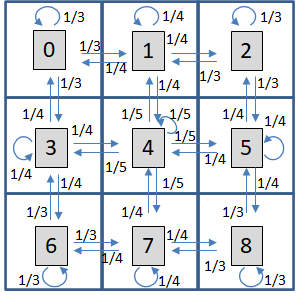


また、遷移行列 $\boldsymbol{T}$は、
$$
\boldsymbol{T} =
\left[ \begin{array}{ccccccccc}
1/3 & 1/4 & 0 & 1/4 & 0 & 0 & 0 & 0 & 0\\
1/3 & 1/4 & 1/3 & 0 & 1/5 & 0 & 0 & 0 & 0\\
0 & 1/4 & 1/3 & 0 & 0 & 1/4 & 0 & 0 & 0\\
1/3 & 0 & 0 & 1/4 & 1/5 & 0 & 1/3 & 0 & 0\\
0 & 1/4 & 0 & 1/4 & 1/5 & 1/4 & 0 & 1/4 & 0\\
0 & 0 & 1/3 & 0 & 1/5 & 1/4 & 0 & 0 & 1/3\\
0 & 0 & 0 & 1/4 & 0 & 0 & 1/3 & 1/4 & 0\\
0 & 0 & 0 & 0 & 1/5 & 0 & 1/3 & 1/4 & 1/3\\
0 & 0 & 0 & 0 & 0 & 1/4 & 0 & 1/4 & 1/3\\
\end{array}
  \right]
$$

のようになります。（LaTeXで書くのはしんどいです。。）

このとき、時刻 $t$ において、各マスに存在する確率をベクトル
$\boldsymbol{p}_t$で表すと、
$$
\boldsymbol{p}_{t+1} = \boldsymbol{T} \boldsymbol{p}_t
$$
が成り立ちます。

ただし、最初の時刻は全てのマス目に等確率に居るとするので、確率ベクトル $\boldsymbol{p}_0$は、
$$
\boldsymbol{p}_0 = \left[ \begin{array}{ccccccccc}
1/9 & 1/9 & 1/9 & 1/9 & 1/9 & 1/9 & 1/9 & 1/9 & 1/9 \\
\end{array}
  \right]^\top
$$
と表されます。

「十分に時間が経った時に各マスにコマが居る確率」は、
$$\boldsymbol{p}_{\infty} = \lim_{t \rightarrow \infty} \boldsymbol{p}_{t}$$

ということになります。

課題ファイルにはヒントとして3つのアプローチを紹介していますが、他にも方法がないか是非考えてみてください。